In [1]:
import sys
sys.path.append("../..")

import helper as hlp
import pandas as pd
import numpy as np

[nltk_data] Downloading package stopwords to C:\Users\Abdul
[nltk_data]     Manaf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
EPOCHS = 50
MAX_LEN = 50
N_CLASSES = 7
BATCH_SIZE = 64
LEARNING_RATE = 2e-5
NAME = 'xlm(roberta)'
MODEL_NAME = 'xlm-roberta-base'
dir = '../../../Dataset/Updated_Dataset'
path = f'D:/IBA_Other_works/MS Work/Depression/Code/Models/Multi/saved_models/{NAME}'
class_names = ['neutral', 'sadness', 'joy', 'anger', 'surprise', 'fear', 'disgust']

In [3]:
train_df = pd.read_csv(f'{dir}/train_data.csv')
val_df = pd.read_csv(f'{dir}/val_data.csv')
test_df = pd.read_csv(f'{dir}/test_data.csv')

train_texts = train_df['tweet'].values
val_texts = val_df['tweet'].values
test_texts = test_df['tweet'].values

In [4]:
train_df

,tweet,label,aspect,anger,disgust,fear,joy,neutral,sadness,surprise,char_length,word_length
0,the first batch of invitations to the power wr...,0,neutral,0,0,0,0,1,0,0,124,26
1,do not make me do the emotional labor of answe...,1,neutral,0,0,0,0,1,0,0,58,13
2,in politicalmedical news there be an impact st...,0,surprise,0,0,0,0,0,0,1,69,12
3,there be no product in sf,0,sadness,0,0,0,0,0,1,0,25,6
4,dad look bianca it be the first time you dress...,0,surprise,0,0,0,0,0,0,1,82,18
...,...,...,...,...,...,...,...,...,...,...,...,...
5416,i be completely worthless,1,sadness,0,0,0,0,0,1,0,25,4
5417,lesson if you do not do the work it will not work,0,sadness,0,0,0,0,0,1,0,49,12
5418,fyi someone be scamming my followers with a fa...,0,sadness,0,0,0,0,0,1,0,192,38
5419,watch the new campaign video an amaze inspire ...,0,surprise,0,0,0,0,0,0,1,82,16


In [5]:
train_labels = train_df[class_names].values
val_labels = val_df[class_names].values
test_labels = test_df[class_names].values

In [6]:
train_labels

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=int64)

In [7]:
#show 5 values along with their labels
for i in range(5):
    print(train_texts[i], train_labels[i])

the first batch of invitations to the power write course be go out now spring21 batch if you get an email from ben you be in [1 0 0 0 0 0 0]
do not make me do the emotional labor of answer how be you [1 0 0 0 0 0 0]
in politicalmedical news there be an impact stool in our body politic [0 0 0 0 1 0 0]
there be no product in sf [0 1 0 0 0 0 0]
dad look bianca it be the first time you dress up like an anime girl me die inside [0 0 0 0 1 0 0]


In [8]:
#show 5 values along with their labels
for i in range(5):
    print(hlp.preprocess_text(train_texts[i])
    , train_labels[i])

first batch invitations power write course go spring21 batch get email ben [1 0 0 0 0 0 0]
make emotional labor answer [1 0 0 0 0 0 0]
politicalmedical news impact stool body politic [0 0 0 0 1 0 0]
product sf [0 1 0 0 0 0 0]
dad look bianca first time dress like anime girl die inside [0 0 0 0 1 0 0]


In [9]:
## apply preprocessing to all texts
train_texts = [hlp.preprocess_text(text) for text in train_texts]
val_texts = [hlp.preprocess_text(text) for text in val_texts]
test_texts = [hlp.preprocess_text(text) for text in test_texts]

In [10]:
## mbert model and tokenizer
import torch
from transformers import XLMRobertaTokenizer, XLMRobertaForSequenceClassification

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tokenizer = XLMRobertaTokenizer.from_pretrained(MODEL_NAME)
model = XLMRobertaForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=N_CLASSES)
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [11]:
train_data_loader = hlp.create_data_loader(train_texts, train_labels, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = hlp.create_data_loader(val_texts, val_labels, tokenizer, MAX_LEN, BATCH_SIZE)

history = hlp.train_model_multi(train_data_loader, val_data_loader, model, optimizer, device, EPOCHS, tokenizer, path)

Epoch 0/50
----------


Training Progress: 100%|██████████| 85/85 [00:39<00:00,  2.15it/s, loss=0.35] 


Train loss 0.4176555475767921 accuracy 0.011068068622025456
Validation loss 0.36900647533567327 accuracy 0.0
No improvement in validation accuracy for 1 epochs.
Epoch 1/50
----------


Training Progress: 100%|██████████| 85/85 [00:38<00:00,  2.20it/s, loss=0.34] 


Train loss 0.3654762997346766 accuracy 0.0011068068622025456
Validation loss 0.35015616918865006 accuracy 0.0
No improvement in validation accuracy for 2 epochs.
Epoch 2/50
----------


Training Progress: 100%|██████████| 85/85 [00:37<00:00,  2.29it/s, loss=0.287]


Train loss 0.33570290944155523 accuracy 0.13779745434421695
Validation loss 0.31947339522211177 accuracy 0.3227194492254733
Model and tokenizer saved at epoch 2
Checkpoint saved: Improved validation accuracy at epoch 2: 0.3227194492254733
Epoch 3/50
----------


Training Progress: 100%|██████████| 85/85 [00:37<00:00,  2.25it/s, loss=0.274]


Train loss 0.29906874982749715 accuracy 0.37170263788968827
Validation loss 0.3063060037399593 accuracy 0.45438898450946646
Model and tokenizer saved at epoch 3
Checkpoint saved: Improved validation accuracy at epoch 3: 0.45438898450946646
Epoch 4/50
----------


Training Progress: 100%|██████████| 85/85 [01:06<00:00,  1.28it/s, loss=0.234]


Train loss 0.2653821608599494 accuracy 0.484781405644715
Validation loss 0.29533184751083974 accuracy 0.4965576592082616
Model and tokenizer saved at epoch 4
Checkpoint saved: Improved validation accuracy at epoch 4: 0.4965576592082616
Epoch 5/50
----------


Training Progress: 100%|██████████| 85/85 [01:01<00:00,  1.38it/s, loss=0.2]  


Train loss 0.23186973350889542 accuracy 0.5757240361556908
Validation loss 0.29317885950991984 accuracy 0.5249569707401033
Model and tokenizer saved at epoch 5
Checkpoint saved: Improved validation accuracy at epoch 5: 0.5249569707401033
Epoch 6/50
----------


Training Progress: 100%|██████████| 85/85 [01:00<00:00,  1.41it/s, loss=0.164]


Train loss 0.19903141172493205 accuracy 0.6594724220623501
Validation loss 0.32841869875004415 accuracy 0.5240963855421686
No improvement in validation accuracy for 1 epochs.
Epoch 7/50
----------


Training Progress: 100%|██████████| 85/85 [00:37<00:00,  2.26it/s, loss=0.156]


Train loss 0.18474801831385668 accuracy 0.6860357867552113
Validation loss 0.3280208597057744 accuracy 0.5292598967297762
Model and tokenizer saved at epoch 7
Checkpoint saved: Improved validation accuracy at epoch 7: 0.5292598967297762
Epoch 8/50
----------


Training Progress: 100%|██████████| 85/85 [01:00<00:00,  1.41it/s, loss=0.114]


Train loss 0.15734254288322785 accuracy 0.7489393100903893
Validation loss 0.3178572686094987 accuracy 0.5464716006884681
Model and tokenizer saved at epoch 8
Checkpoint saved: Improved validation accuracy at epoch 8: 0.5464716006884681
Epoch 9/50
----------


Training Progress: 100%|██████████| 85/85 [01:54<00:00,  1.35s/it, loss=0.0988]


Train loss 0.13649324783507516 accuracy 0.7902600996126176
Validation loss 0.31038279988263784 accuracy 0.5645438898450946
Model and tokenizer saved at epoch 9
Checkpoint saved: Improved validation accuracy at epoch 9: 0.5645438898450946
Epoch 10/50
----------


Training Progress: 100%|██████████| 85/85 [01:14<00:00,  1.14it/s, loss=0.104]  


Train loss 0.12103889610837487 accuracy 0.8247555801512636
Validation loss 0.33473033497208043 accuracy 0.5516351118760757
No improvement in validation accuracy for 1 epochs.
Epoch 11/50
----------


Training Progress: 100%|██████████| 85/85 [00:37<00:00,  2.26it/s, loss=0.0939]


Train loss 0.1100233986535493 accuracy 0.841911086515403
Validation loss 0.33413798871793243 accuracy 0.5783132530120482
Model and tokenizer saved at epoch 11
Checkpoint saved: Improved validation accuracy at epoch 11: 0.5783132530120482
Epoch 12/50
----------


Training Progress: 100%|██████████| 85/85 [01:09<00:00,  1.22it/s, loss=0.0797] 


Train loss 0.09778671378598494 accuracy 0.8612802066039477
Validation loss 0.33884240294757645 accuracy 0.5877796901893287
Model and tokenizer saved at epoch 12
Checkpoint saved: Improved validation accuracy at epoch 12: 0.5877796901893287
Epoch 13/50
----------


Training Progress: 100%|██████████| 85/85 [01:10<00:00,  1.21it/s, loss=0.103]  


Train loss 0.09222200552330298 accuracy 0.872163807415606
Validation loss 0.3667004484879343 accuracy 0.5619621342512908
No improvement in validation accuracy for 1 epochs.
Epoch 14/50
----------


Training Progress: 100%|██████████| 85/85 [00:36<00:00,  2.31it/s, loss=0.0566]


Train loss 0.0743801864411901 accuracy 0.8978048330566316
Validation loss 0.3833433609259756 accuracy 0.5636833046471601
No improvement in validation accuracy for 2 epochs.
Epoch 15/50
----------


Training Progress: 100%|██████████| 85/85 [00:37<00:00,  2.28it/s, loss=0.0434]


Train loss 0.06528909668764647 accuracy 0.9134845969378343
Validation loss 0.3747143290544811 accuracy 0.5791738382099828
No improvement in validation accuracy for 3 epochs.
Epoch 16/50
----------


Training Progress: 100%|██████████| 85/85 [00:37<00:00,  2.27it/s, loss=0.0946]


Train loss 0.055424892201143154 accuracy 0.9321158457849106
Validation loss 0.38433816401582016 accuracy 0.5826161790017211
No improvement in validation accuracy for 4 epochs.
Epoch 17/50
----------


Training Progress: 100%|██████████| 85/85 [00:36<00:00,  2.30it/s, loss=0.0729]


Train loss 0.04736345991054002 accuracy 0.9404168972514296
Validation loss 0.3954940908833554 accuracy 0.5834767641996558
No improvement in validation accuracy for 5 epochs.
Stopping early due to lack of improvement in validation accuracy.


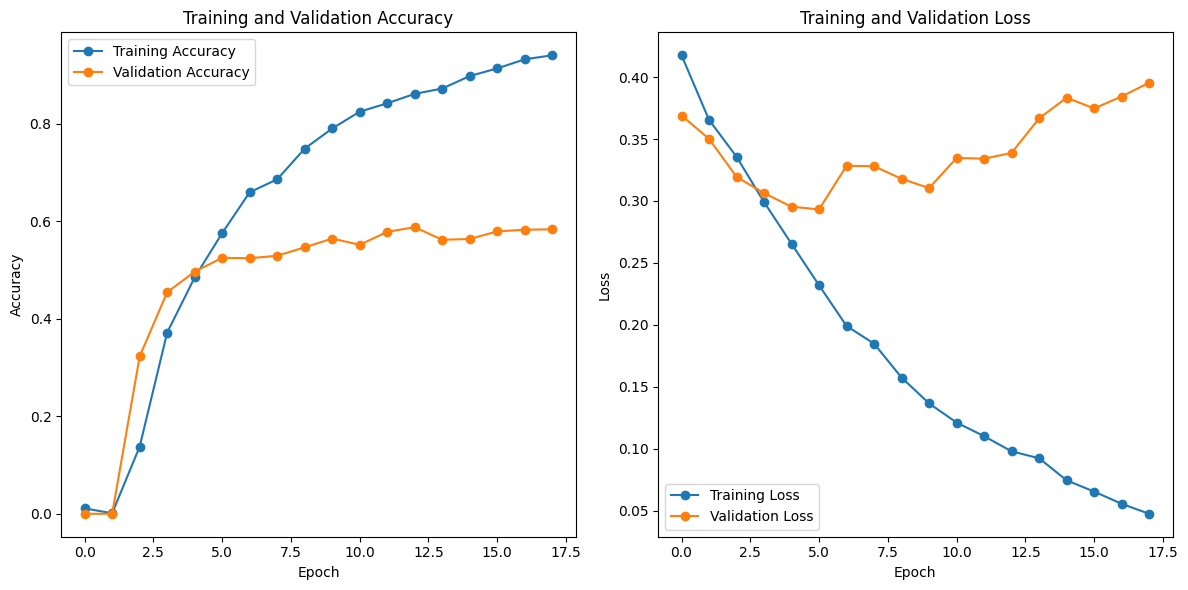

In [12]:
hlp.plot_history(history)

In [13]:
import os
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

def extract_epoch_number(dir):
    files = os.listdir(dir)
    epoch = 0
    for file in files:
        if 'model_epoch' in file:
            epoch = max(epoch, int(file.split('_')[-1]))
    return epoch

path = f'D:/IBA_Other_works/MS Work/Depression/Code/Models/Multi/saved_models/{NAME}'
epoch = extract_epoch_number(path)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tokenizer = AutoTokenizer.from_pretrained(f'{path}/tokenizer')
model = AutoModelForSequenceClassification.from_pretrained(f'{path}/model_epoch_{epoch}', num_labels=N_CLASSES)
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)
model = model.to(device)

In [14]:
test_data_loader = hlp.create_data_loader(test_texts, test_labels, tokenizer, MAX_LEN, BATCH_SIZE)

test_acc, test_loss, test_label_actual, test_label_pred = hlp.eval_model_multi(model, test_data_loader, device)

print(f'Test Accuracy: {test_acc} Test Loss: {test_loss}')

Test Accuracy: 0.5731497418244407 Test Loss: 0.3338649029794492


Accuracy: 0.6
F1 Score: 0.61
Precision: 0.64
Recall: 0.6

Classification Report:
              precision    recall  f1-score   support

     neutral       0.72      0.61      0.66       491
     sadness       0.62      0.65      0.64       231
         joy       0.62      0.52      0.57       242
       anger       0.42      0.57      0.48        90
    surprise       0.38      0.69      0.49        49
        fear       0.55      0.66      0.60        59
     disgust       0.00      0.00      0.00         0

    accuracy                           0.60      1162
   macro avg       0.47      0.53      0.49      1162
weighted avg       0.64      0.60      0.61      1162



c:\Users\Abdul Manaf\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Abdul Manaf\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Abdul Manaf\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, 

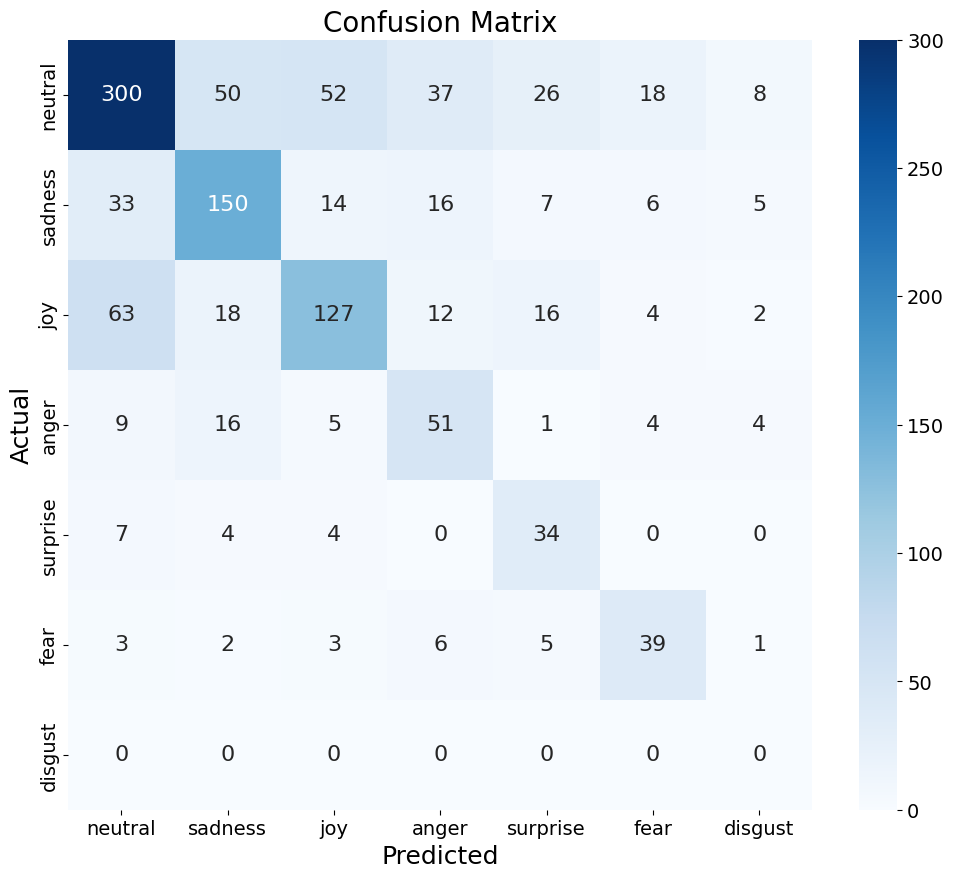

In [15]:
hlp.plot_confusion_matrix(np.argmax(test_label_actual, axis=1), np.argmax(test_label_pred, axis=1), class_names)